In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/processed/airline_passengers.csv', index_col='Month', parse_dates=True)

In [3]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df['LogPassengers'] = np.log(df['Passengers'])

In [5]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [7]:
import pmdarima as pm

In [8]:
model = pm.auto_arima(train['Passengers'], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.857, Time=0.38 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.555, Time=0.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.16 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.543, Time=1.02 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.120, Time=0.35 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=907.022, Time=2.96 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.611, Time=0.29 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.396, Time=0.93 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.24 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.713, Time=0.67 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   :

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -447.843
Date:                            Sun, 21 Feb 2021   AIC                            905.686
Time:                                    10:33:07   BIC                            919.623
Sample:                                         0   HQIC                           911.346
                                            - 132                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      5.5341      2.007      2.757      0.006       1.600       9.468
ar.L1          0.7049      0.095      7.393      0.000       0.518       0.892
ar.L2          0.2574      0.131      1.968      0.049       0.001       0.514
ar.L3         -0.1434      0.107     -1.338      0.181      -0.354       0.067
sigma2       101.0969     12.818      7.887      0.000      75.974     126.220
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.83
Prob(Q):                              0.96   Prob(JB):                         0.24
Heteroskedasticity (H):               1.41   Skew:                            -0.14
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

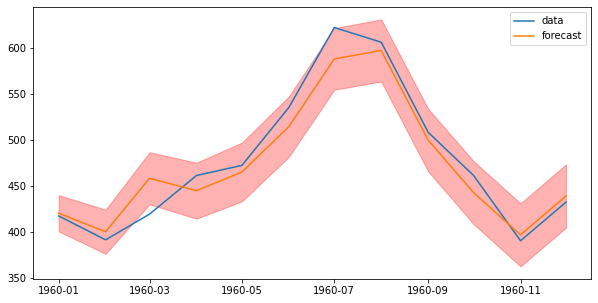

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['Passengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
ax.legend();

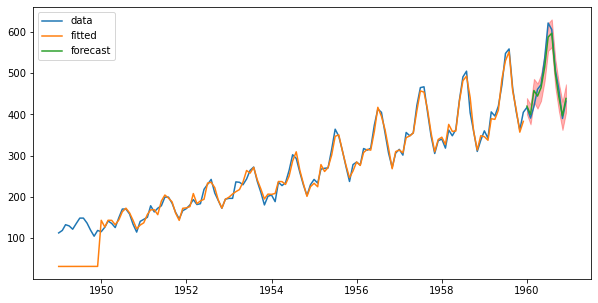

In [19]:
train_pred = model.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['Passengers'], label='data')
ax.plot(train.index, train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
ax.legend();

In [20]:
logmodel = pm.auto_arima(train['LogPassengers'], trace=True, suppress_warnings=True, seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-439.870, Time=1.91 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-317.949, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-433.027, Time=0.84 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-383.189, Time=0.71 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-134.983, Time=0.02 sec
 ARIMA(2,0,2)(0,1,1)[12] intercept   : AIC=-444.327, Time=1.64 sec
 ARIMA(2,0,2)(0,1,0)[12] intercept   : AIC=-414.783, Time=0.92 sec
 ARIMA(2,0,2)(0,1,2)[12] intercept   : AIC=-442.331, Time=3.64 sec
 ARIMA(2,0,2)(1,1,0)[12] intercept   : AIC=-436.716, Time=1.48 sec
 ARIMA(2,0,2)(1,1,2)[12] intercept   : AIC=inf, Time=3.67 sec
 ARIMA(1,0,2)(0,1,1)[12] intercept   : AIC=-445.573, Time=1.20 sec
 ARIMA(1,0,2)(0,1,0)[12] intercept   : AIC=-414.732, Time=0.62 sec
 ARIMA(1,0,2)(1,1,1)[12] intercept   : AIC=-440.989, Time=1.52 sec
 ARIMA(1,0,2)(0,1,2)[12] intercept   : AIC=-443.579, Time=2.74 sec
 ARIMA(1,0,2)(1,1,0)[12]

In [21]:
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(2, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 229.026
Date:                              Sun, 21 Feb 2021   AIC                           -448.052
Time:                                      10:46:00   BIC                           -434.114
Sample:                                           0   HQIC                          -442.392
                                              - 132                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0193      0.009      2.155      0.031       0.002       0.037
ar.L1          0.5995      0.083      7.261      0.000       0.438       0.761
ar.L2          0.2424      0.085      2.863      0.004       0.076       0.408
ma.S.L12      -0.5673      0.105     -5.421      0.000      -0.772      -0.362
sigma2         0.0012      0.000      8.194      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.08
Prob(Q):                              1.00   Prob(JB):                         0.05
Heteroskedasticity (H):               0.36   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

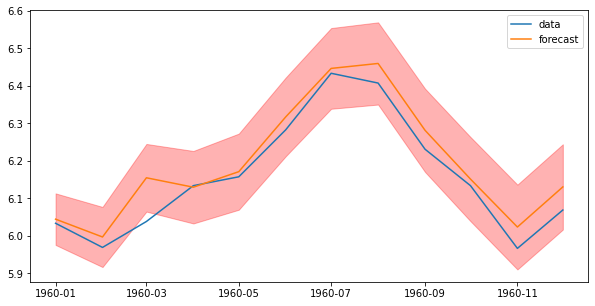

In [23]:
test_pred_log, confint = logmodel.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
ax.legend();

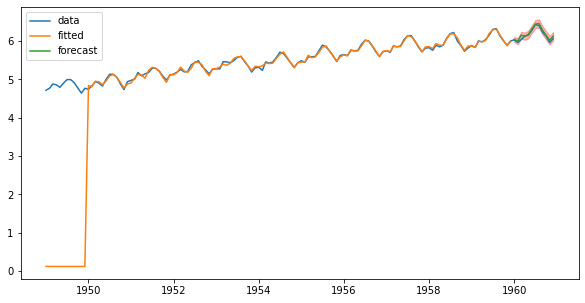

In [24]:
train_pred_log = logmodel.predict_in_sample(start=0, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index, train_pred_log, label='fitted')
ax.plot(test.index, test_pred_log, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
ax.legend();

## Forecast RSME

In [25]:
def rmse(t, y):
    return np.sqrt(np.mean((t - y)**2))

In [26]:
print("Non-logged RSME:", rmse(test['Passengers'], test_pred))
print("Logged RSME:", rmse(test['Passengers'], np.exp(test_pred_log)))

Non-logged RSME: 18.53646879692902
Logged RSME: 23.047107587669597


In [48]:
test_pred

array([6.05296673, 6.00959962, 6.14004199, 6.12923522, 6.19283853,
       6.30303462, 6.43409048, 6.44634421, 6.28102275, 6.15256038,
       6.03644006, 6.14080781])

### non-seasonal

In [40]:
model = pm.auto_arima(train['LogPassengers'], trace=True, suppress_warnings=True, max_p=12, max_q=2, max_order=14, stepwise=False, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-211.983, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-216.493, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-214.718, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-221.069, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-216.622, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-240.135, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-216.024, Time=0.19 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-246.399, Time=0.78 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-229.057, Time=0.33 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-227.139, Time=0.81 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-251.325, Time=1.52 sec
 ARIMA(5,1,0)(0,0,0)[0] interc

In [41]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:              SARIMAX(12, 1, 1)   Log Likelihood                 227.322
Date:                Sun, 21 Feb 2021   AIC                           -424.644
Time:                        11:01:17   BIC                           -381.516
Sample:                             0   HQIC                          -407.119
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0071      0.006      1.177      0.239      -0.005       0.019
ar.L1          0.0411      0.094      0.438      0.661      -0.143       0.225
ar.L2         -0.0937      0.069     -1.364      0.173      -0.228       0.041
ar.L3         -0.0482      0.068     -0.709      0.478      -0.182       0.085
ar.L4         -0.1089      0.074     -1.476      0.140      -0.254       0.036
ar.L5          0.0002      0.067      0.003      0.998      -0.131       0.131
ar.L6         -0.0741      0.069     -1.081      0.279      -0.208       0.060
ar.L7         -0.0470      0.074     -0.637      0.524      -0.192       0.098
ar.L8         -0.1363      0.069     -1.974      0.048      -0.272      -0.001
ar.L9          0.0130      0.079      0.165      0.869      -0.142       0.168
ar.L10        -0.0928      0.067     -1.384      0.166      -0.224       0.039
ar.L11        -0.0022      0.073     -0.031      0.976      -0.145       0.141
ar.L12         0.7787      0.064     12.099      0.000       0.653       0.905
ma.L1         -0.3132      0.136     -2.305      0.021      -0.580      -0.047
sigma2         0.0016      0.000      6.972      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.56   Jarque-Bera (JB):                 2.95
Prob(Q):                              0.46   Prob(JB):                         0.23
Heteroskedasticity (H):               0.35   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

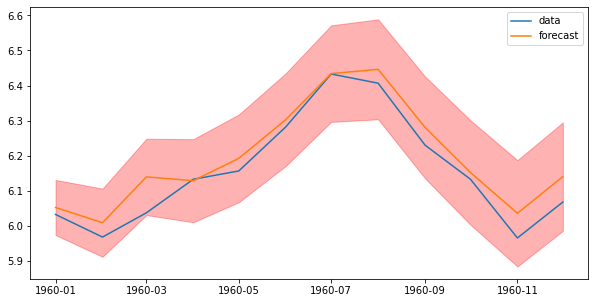

In [42]:
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(test.index, test['LogPassengers'], label='data')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
ax.legend();

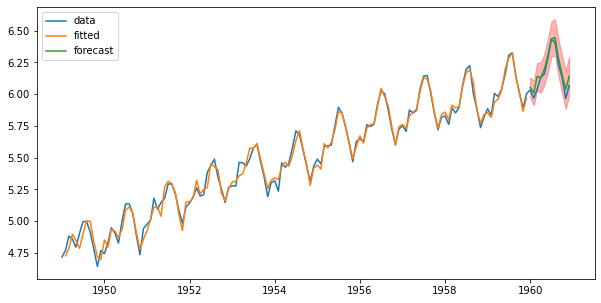

In [43]:
train_pred = model.predict_in_sample(start=1, end=-1)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(df.index, df['LogPassengers'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, confint[:,0], confint[0:,1], color='red', alpha=0.3)
ax.legend();

In [44]:
rmse(test['Passengers'], np.exp(test_pred))

22.4008486364705